<a href="https://colab.research.google.com/github/aniray2908/ML-foundations-rebuild/blob/main/statistical_learning/04_model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Comparison: OLS vs Ridge vs Lasso vs Random Forest

In this notebook, we:

- Compare multiple regression models
- Use 5-fold cross-validation
- Tune regularization parameters
- Evaluate generalization performance

Goal:
Demonstrate structured model selection and evaluation.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression

## Step 1: Generate Synthetic Regression Dataset

We simulate:

- 300 samples
- 40 features
- 15 informative features
- Moderate noise

This allows comparison across model types.


In [2]:
np.random.seed(42)

X, y = make_regression(
    n_samples=300,
    n_features=40,
    n_informative=15,
    noise=20,
    random_state=42
)

## Step 2: Define 5-Fold Cross-Validation

Balanced bias–variance tradeoff for model evaluation.


In [3]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

## Step 3: Define Candidate Models

We compare:

- OLS
- Ridge (alpha tuned)
- Lasso (alpha tuned)
- Random Forest


In [4]:
models = {}

models["OLS"] = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

models["Ridge"] = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=1.0))
])

models["Lasso"] = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Lasso(alpha=0.1))
])

models["Random Forest"] = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

## Step 4: Cross-Validate All Models

We compute:

- 5-fold CV MSE
- Mean performance


In [5]:
results = {}

for name, model in models.items():
    scores = cross_val_score(
        model,
        X,
        y,
        scoring="neg_mean_squared_error",
        cv=kf
    )
    results[name] = -scores.mean()

results_df = pd.DataFrame.from_dict(results, orient="index", columns=["CV MSE"])
results_df.sort_values(by="CV MSE")


,CV MSE
Lasso,443.195043
OLS,449.723864
Ridge,449.728602
Random Forest,19492.464102


## Step 5: Visual Comparison


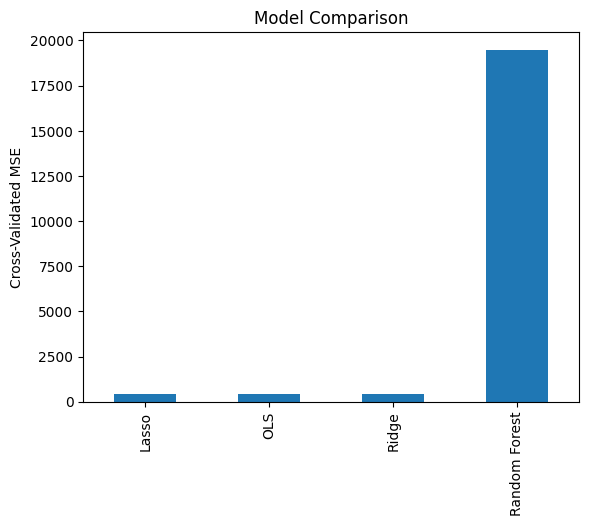

In [6]:
results_df.sort_values(by="CV MSE").plot(kind="bar", legend=False)
plt.ylabel("Cross-Validated MSE")
plt.title("Model Comparison")
plt.show()

## Observations

- OLS may struggle under multicollinearity.
- Ridge stabilizes coefficients.
- Lasso may reduce noise through sparsity.
- Random Forest captures nonlinearities.

Performance differences depend on:
- Signal structure
- Noise level
- Dataset size

Key Insight:
Model choice depends on bias–variance tradeoff and data structure.
